In [1]:
!pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 55.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 62.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 80.6 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=1175cf443ecaa62f9ba2c5bdd1c4449da6a215da6cdd1781f0189b29473818b7
  Stored in directory: /root/.cache/pip/wheels/5e/6f/8c/d88aec621f3f542d26fac0342bef5e693335d125f4e54aeffe
Successfully built sentence-transformers


In [2]:
!cp -r drive/MyDrive/Data .

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from sklearn import metrics
from sklearn.multioutput import MultiOutputClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from utils import *

In [22]:
def get_emb(name, text):
    if name=='tf-idf':
        all_text = np.concatenate([text['train'], text['test']])
        vectorizer = TfidfVectorizer()
        emb = vectorizer.fit_transform(all_text)
        return emb[:text['train'].shape[0]], emb[text['train'].shape[0]:]
    elif name=='labse':
        labse_model = SentenceTransformer('sentence-transformers/LaBSE')
        emb = labse_model.encode(text)
        return emb

In [6]:
df_x_train, df_y_train, df_x_val, df_y_val, df_x_test = load_data()

In [7]:
df_y_train[df_y_train == 1].sum()

Argument ID                        0
Self-direction: thought        988.0
Self-direction: action        1395.0
Stimulation                    247.0
Hedonism                       172.0
Achievement                   1512.0
Power: dominance               610.0
Power: resources               625.0
Face                           382.0
Security: personal            2000.0
Security: societal            1728.0
Tradition                      568.0
Conformity: rules             1177.0
Conformity: interpersonal      207.0
Humility                       395.0
Benevolence: caring           1332.0
Benevolence: dependability     806.0
Universalism: concern         2081.0
Universalism: nature           427.0
Universalism: tolerance        664.0
Universalism: objectivity     1054.0
dtype: object

In [8]:
df_x_train['text'] = df_x_train['Conclusion']+' '+df_x_train['Stance']+' '+df_x_train['Premise']
df_x_val['text'] = df_x_val['Conclusion']+' '+df_x_val['Stance']+' '+df_x_val['Premise']
df_x_train['text'] = df_x_train['text'].str.lower()
df_x_val['text'] = df_x_val['text'].str.lower()
x_train = df_x_train['text'].to_numpy()
x_val = df_x_val['text'].to_numpy()
y_train = df_y_train.loc[:, df_y_train.columns != 'Argument ID'].to_numpy()
y_val = df_y_val.loc[:, df_y_val.columns != 'Argument ID'].to_numpy()

In [9]:
train_emb = get_emb('labse', x_train)
val_emb = get_emb('labse', x_val)

Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/114 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.36M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.62k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/804 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.88G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/9.62M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/411 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/5.22M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/461 [00:00<?, ?B/s]

In [10]:
svm = LinearSVC(random_state=42)

multilabel_classifier = MultiOutputClassifier(svm, n_jobs=-1)

multilabel_classifier = multilabel_classifier.fit(train_emb, y_train)

y_val_pred = multilabel_classifier.predict(val_emb)

,0
f1-macro,0.317017
f1-micro,0.466839
f1-weighted,0.430322
f1 on class Self-direction: thought,0.290123
f1 on class Self-direction: action,0.429814
f1 on class Stimulation,0.000000
f1 on class Hedonism,0.385714
f1 on class Achievement,0.565310
f1 on class Power: dominance,0.057143
f1 on class Power: resources,0.314286


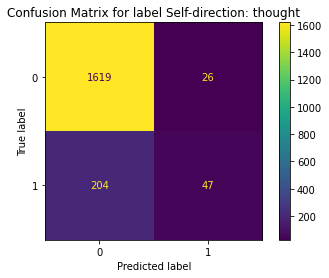

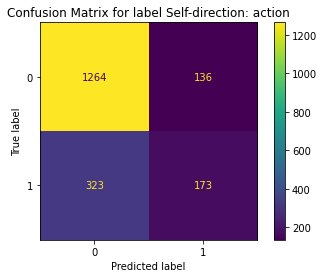

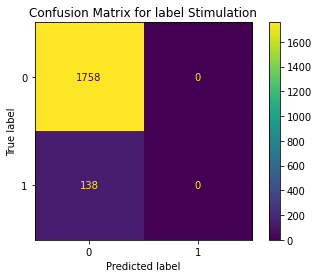

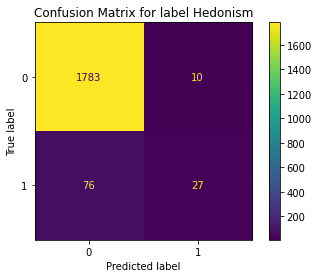

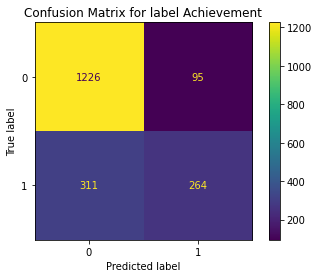

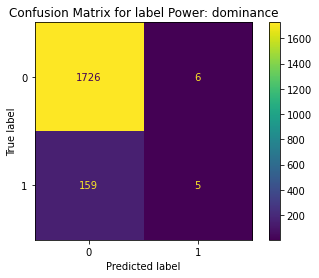

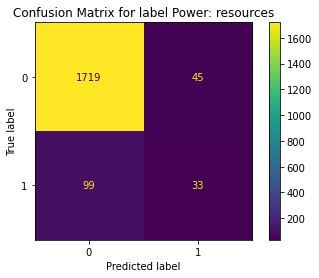

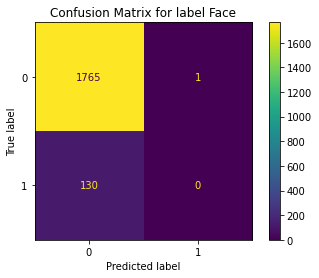

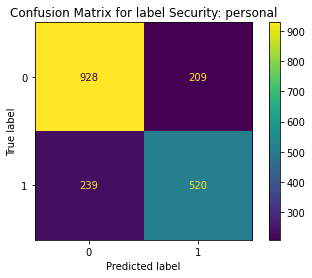

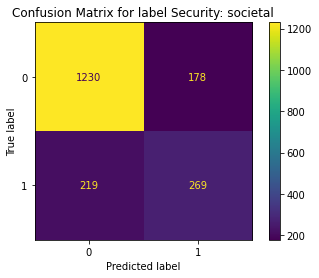

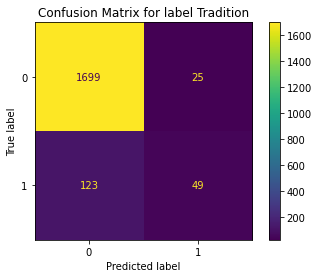

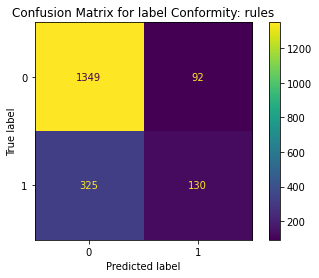

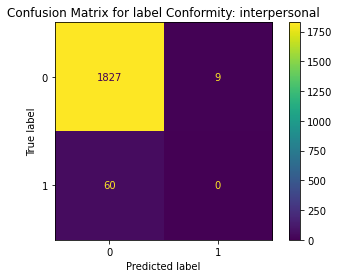

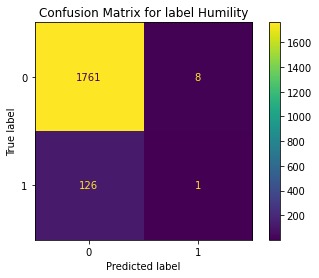

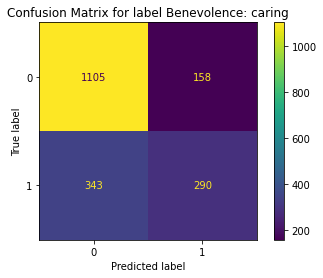

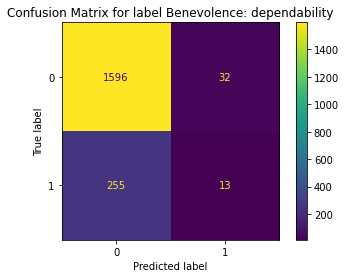

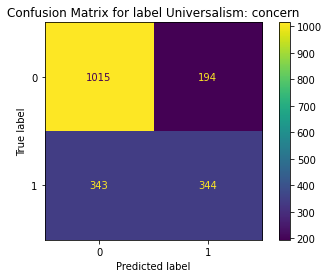

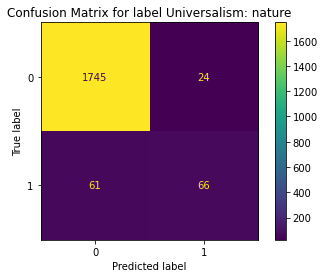

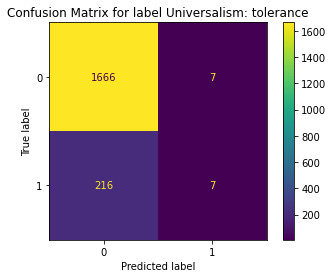

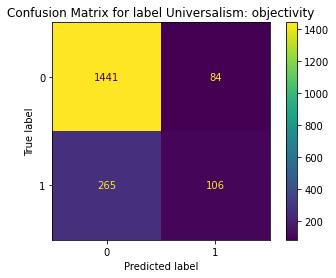

In [11]:
!rm -rf SVM-labse
evaluate('SVM-labse', y_val_pred, y_val)

In [23]:
train_emb, val_emb = get_emb('tf-idf', {'train':x_train, 'test':x_val})

In [24]:
svm = LinearSVC(random_state=42)

multilabel_classifier = MultiOutputClassifier(svm, n_jobs=-1)

multilabel_classifier = multilabel_classifier.fit(train_emb, y_train)

y_val_pred = multilabel_classifier.predict(val_emb)

,0
f1-macro,0.235592
f1-micro,0.371557
f1-weighted,0.342081
f1 on class Self-direction: thought,0.280992
f1 on class Self-direction: action,0.450935
f1 on class Stimulation,0.000000
f1 on class Hedonism,0.055556
f1 on class Achievement,0.443941
f1 on class Power: dominance,0.064865
f1 on class Power: resources,0.191617


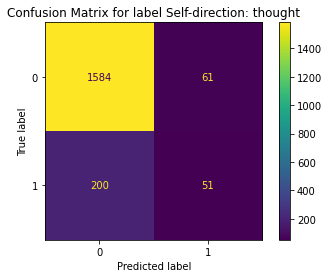

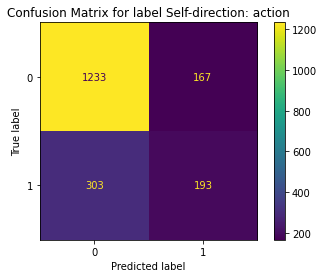

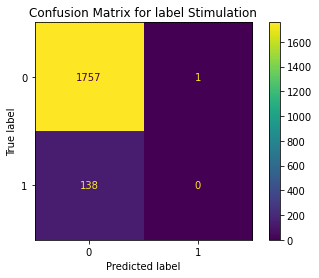

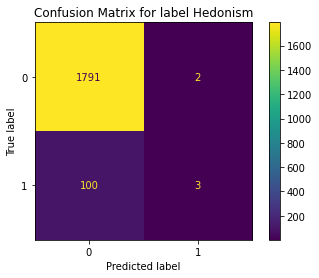

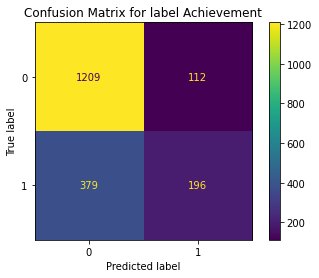

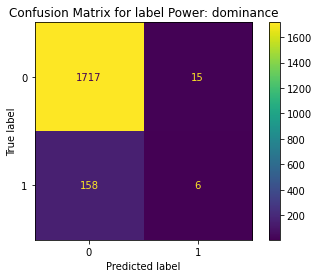

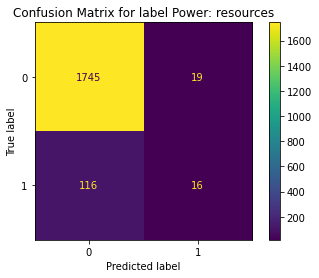

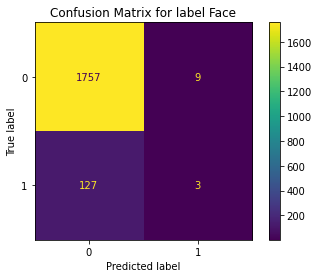

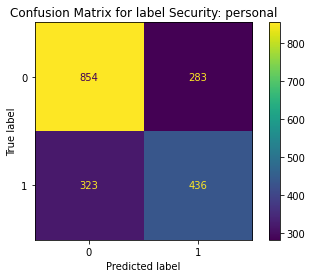

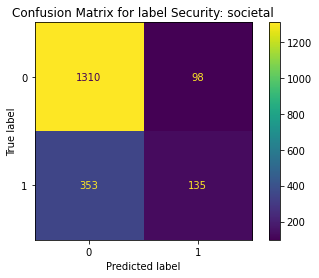

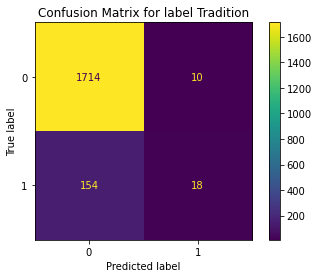

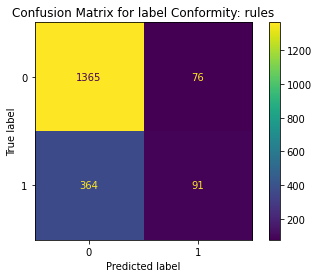

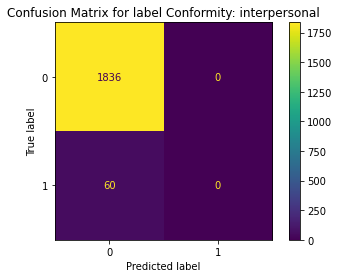

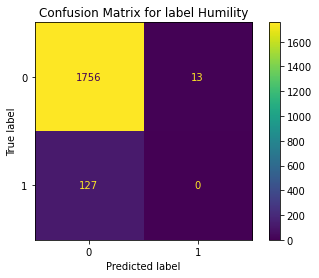

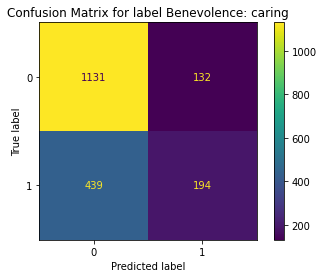

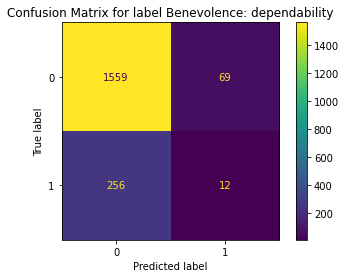

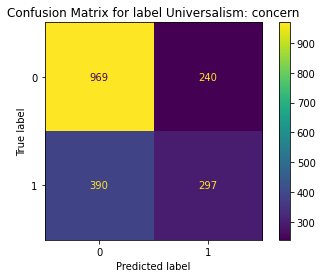

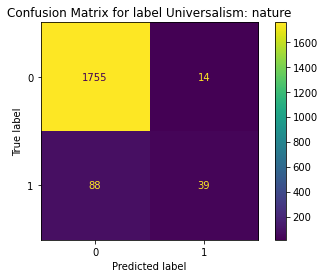

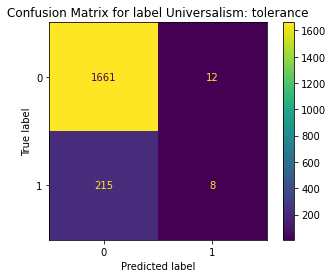

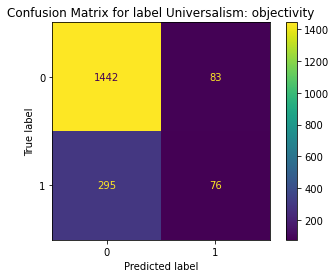

In [25]:
!rm -rf SVM-tfidf
evaluate('SVM-tfidf', y_val_pred, y_val)

In [30]:
!zip -r SVM-labse.zip SVM-labse

  adding: SVM-labse/ (stored 0%)
  adding: SVM-labse/res.tex (deflated 67%)
  adding: SVM-labse/Confusion_Universalism: nature.png (deflated 9%)
  adding: SVM-labse/Confusion_Tradition.png (deflated 9%)
  adding: SVM-labse/Confusion_Universalism: concern.png (deflated 10%)
  adding: SVM-labse/Confusion_Power: resources.png (deflated 9%)
  adding: SVM-labse/Confusion_Self-direction: action.png (deflated 8%)
  adding: SVM-labse/Confusion_Stimulation.png (deflated 9%)
  adding: SVM-labse/Confusion_Conformity: rules.png (deflated 8%)
  adding: SVM-labse/Confusion_Security: personal.png (deflated 9%)
  adding: SVM-labse/Confusion_Benevolence: dependability.png (deflated 9%)
  adding: SVM-labse/Confusion_Face.png (deflated 9%)
  adding: SVM-labse/Confusion_Security: societal.png (deflated 9%)
  adding: SVM-labse/Confusion_Universalism: tolerance.png (deflated 9%)
  adding: SVM-labse/Confusion_Benevolence: caring.png (deflated 9%)
  adding: SVM-labse/Confusion_Power: dominance.png (deflated 9

In [31]:
!zip -r SVM-tfidf.zip SVM-tfidf

  adding: SVM-tfidf/ (stored 0%)
  adding: SVM-tfidf/res.tex (deflated 67%)
  adding: SVM-tfidf/Confusion_Universalism: nature.png (deflated 9%)
  adding: SVM-tfidf/Confusion_Tradition.png (deflated 10%)
  adding: SVM-tfidf/Confusion_Universalism: concern.png (deflated 10%)
  adding: SVM-tfidf/Confusion_Power: resources.png (deflated 9%)
  adding: SVM-tfidf/Confusion_Self-direction: action.png (deflated 9%)
  adding: SVM-tfidf/Confusion_Stimulation.png (deflated 10%)
  adding: SVM-tfidf/Confusion_Conformity: rules.png (deflated 9%)
  adding: SVM-tfidf/Confusion_Security: personal.png (deflated 9%)
  adding: SVM-tfidf/Confusion_Benevolence: dependability.png (deflated 9%)
  adding: SVM-tfidf/Confusion_Face.png (deflated 10%)
  adding: SVM-tfidf/Confusion_Security: societal.png (deflated 9%)
  adding: SVM-tfidf/Confusion_Universalism: tolerance.png (deflated 9%)
  adding: SVM-tfidf/Confusion_Benevolence: caring.png (deflated 9%)
  adding: SVM-tfidf/Confusion_Power: dominance.png (deflate